# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [3]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.head(100)

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...
95,80,2013-08-16 04:26:49+00,851,147.381861,49.430685,2.161009,0.320156,Eric
96,98,2013-08-16 04:41:58+00,851,8.873764,49.430979,2.161090,0.791202,Eric
97,72,2013-08-16 04:57:11+00,851,179.680479,49.436785,2.169278,1.912119,Eric
98,76,2013-08-16 05:12:39+00,851,170.091666,49.436738,2.170161,0.402616,Eric


### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [68]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby(by="bird_name")
grouped_birds.head(4)

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.speed_2d.mean()
print(mean_speeds)

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.altitude.mean()
print(mean_altitudes)

birddata.info()

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64
bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   altitude            61920 non-null  int64         
 1   date_time           61920 non-null  datetime64[ns]
 2   device_info_serial  61920 non-null  int64         
 3   direction           61477 non-null  float64       
 4   latitude            61920 non-null  float64       
 5   longitude           61920 non-null  float64       
 6   speed_2d            61477 non-null  float64       
 7   bird_name           61920 non-null  object        
 8   date                61920 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 7.2+ MB


### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [43]:
import datetime
# 2013-08-16 04:26:49+00 
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = [birddata.date_time[i].date() for i in range(len(birddata.date_time))]
#pd.Series([birddata.date_time[i].day for i in range(len(birddata.date_time)) ], index = birddata.index)

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby(by="date")

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()

mean_altitudes_perday.head(30)


date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
2013-08-20    184.461224
2013-08-21    171.546185
2013-08-22    114.172691
2013-08-23    144.716049
2013-08-24    101.446721
2013-08-25     93.162602
2013-08-26     75.995951
2013-08-27     84.591093
2013-08-28    111.210526
2013-08-29    177.421488
2013-08-30     92.520161
2013-08-31    160.975904
2013-09-01     84.753086
2013-09-02     88.128514
2013-09-03     93.975709
2013-09-04     90.717213
2013-09-05     87.264000
2013-09-06     89.020492
2013-09-07    103.412955
2013-09-08     76.566265
2013-09-09     81.483471
2013-09-10     90.618852
2013-09-11     77.222672
2013-09-12     75.646091
2013-09-13     66.615079
Name: altitude, dtype: float64

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [47]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(["date","bird_name"])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.mean()
mean_altitudes_perday.head(15)

altitude  device_info_serial  direction   latitude  \
date       bird_name                                                         
2013-08-15 Eric        74.988095               851.0  -6.835297  49.414351   
           Nico       222.421687               864.0 -11.321902  50.223294   
           Sanne      105.578313               833.0 -24.456258  49.943671   
2013-08-16 Eric       127.773810               851.0   3.711103  49.559370   
           Nico       181.740741               864.0 -24.956945  50.056910   
           Sanne       93.743590               833.0   2.737479  49.902011   
2013-08-17 Eric       125.890244               851.0 -19.291321  50.002152   
           Nico       216.595238               864.0 -21.584506  50.064639   
           Sanne       96.912500               833.0  -1.524999  49.910743   
2013-08-18 Eric       121.353659               851.0  10.908698  50.019464   
           Nico       166.409639               864.0   6.646038  50.057292   
           Sanne       99.887500               833.0 -23.478036  49.978816   
2013-08-19 Eric       134.928571               851.0   0.648153  50.008427   
           Nico       291.679012               864.0 -25.053789  50.123934   
           Sanne      115.592593               833.0 -31.993464  50.039935   

                      longitude  speed_2d  
date       bird_name                       
2013-08-15 Eric        2.206514  2.121517  
           Nico        4.194853  2.856924  
           Sanne       2.509159  3.392506  
2013-08-16 Eric        2.236405  2.618113  
           Nico        3.790862  3.386387  
           Sanne       2.620324  2.328489  
2013-08-17 Eric        2.259934  1.765809  
           Nico        3.795386  3.123210  
           Sanne       2.772998  2.124465  
2013-08-18 Eric        2.263452  2.951171  
           Nico        3.834899  2.785776  
           Sanne       2.730573  3.064796  
2013-08-19 Eric        2.215777  2.435545  
           Nico        4.366207  2.920577  
           Sanne       2.985126  2.542491

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

In [71]:
import matplotlib.pyplot as plt
data_Eric = birddata.loc[birddata["bird_name"]=="Eric"]
data_Sanne = birddata.loc[birddata["bird_name"]=="Sanne"]
data_Nico = birddata.loc[birddata["bird_name"]=="Nico"]
birddata.head()

eric_daily_speed  = data_Eric.groupby("date")
sanne_daily_speed = data_Sanne.groupby("date")
nico_daily_speed  = data_Nico.groupby("date")

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()

'\neric_daily_speed  = data_Eric.groupby("date")\nsanne_daily_speed = data_Sanne.groupby("date")\nnico_daily_speed  = data_Nico.groupby("date")\n\neric_daily_speed.plot(label="Eric")\nsanne_daily_speed.plot(label="Sanne")\nnico_daily_speed.plot(label="Nico")\nplt.legend(loc="upper left")\nplt.show()'

In [72]:
import matplotlib.pyplot as plt
data_Eric = birddata.loc[birddata["bird_name"]=="Eric"]
data_Sanne = birddata.loc[birddata["bird_name"]=="Sanne"]
data_Nico = birddata.loc[birddata["bird_name"]=="Nico"]
birddata.head()


,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,date
0,71,2013-08-15 00:18:08,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15
1,68,2013-08-15 00:48:07,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15
2,68,2013-08-15 01:17:58,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15
3,73,2013-08-15 01:47:51,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15
4,69,2013-08-15 02:17:42,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15


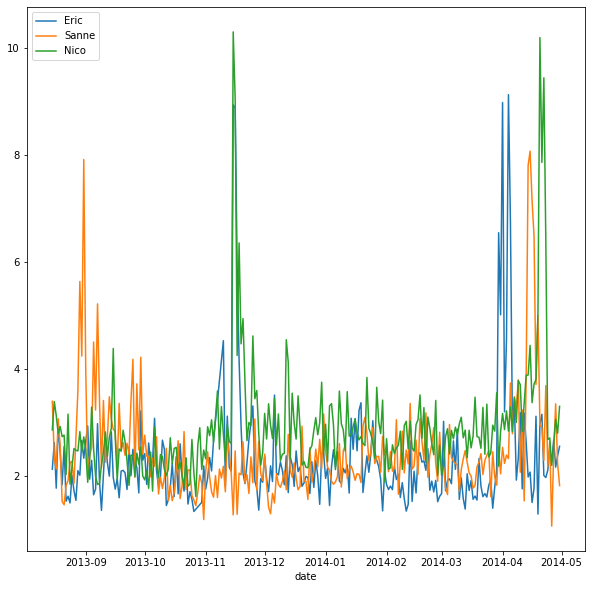

In [88]:
import matplotlib.pyplot as plt
data_Eric = birddata.loc[birddata["bird_name"]=="Eric"]
data_Sanne = birddata.loc[birddata["bird_name"]=="Sanne"]
data_Nico = birddata.loc[birddata["bird_name"]=="Nico"]
eric_daily_speed  = data_Eric.groupby("date")
eric_daily_speed.mean()["speed_2d"]

eric_daily_speed  = data_Eric.groupby("date").mean()["speed_2d"]
sanne_daily_speed = data_Sanne.groupby("date").mean()["speed_2d"]
nico_daily_speed  = data_Nico.groupby("date").mean()["speed_2d"]

nico_daily_speed.head(20)

plt.figure(figsize=(10,10))
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()

In [83]:
import matplotlib.pyplot as plt
data_Eric = birddata.loc[birddata["bird_name"]=="Eric"]
data_Sanne = birddata.loc[birddata["bird_name"]=="Sanne"]
data_Nico = birddata.loc[birddata["bird_name"]=="Nico"]
eric_daily_speed  = data_Eric.groupby("date")
eric_daily_speed.mean().head()["speed_2d"]

date
2013-08-15    2.121517
2013-08-16    2.618113
2013-08-17    1.765809
2013-08-18    2.951171
2013-08-19    2.435545
Name: speed_2d, dtype: float64

In [89]:
nico_daily_speed.head(20)

date
2013-08-15    2.856924
2013-08-16    3.386387
2013-08-17    3.123210
2013-08-18    2.785776
2013-08-19    2.920577
2013-08-20    2.730114
2013-08-21    2.759074
2013-08-22    2.020524
2013-08-23    3.152283
2013-08-24    1.840692
2013-08-25    2.154902
2013-08-26    2.506818
2013-08-27    2.476388
2013-08-28    2.462865
2013-08-29    2.823951
2013-08-30    2.445771
2013-08-31    2.725194
2013-09-01    2.480032
2013-09-02    1.876902
2013-09-03    2.276983
Name: speed_2d, dtype: float64

In [100]:
nico_daily_speed.tail(30)

date
2014-04-01     3.163723
2014-04-02     2.861222
2014-04-03     3.212099
2014-04-04     2.832465
2014-04-05     3.283842
2014-04-06     2.824700
2014-04-07     3.455989
2014-04-08     2.995421
2014-04-09     3.780186
2014-04-10     3.703409
2014-04-11     2.829536
2014-04-12     3.341111
2014-04-13     3.878121
2014-04-14     3.882314
2014-04-15     4.437659
2014-04-16     3.366451
2014-04-17     3.713230
2014-04-18     3.798646
2014-04-19     5.061530
2014-04-20    10.196981
2014-04-21     7.861385
2014-04-22     9.445087
2014-04-23     6.384096
2014-04-24     2.674536
2014-04-25     2.705160
2014-04-26     2.192028
2014-04-27     2.582072
2014-04-28     3.055051
2014-04-29     2.793232
2014-04-30     3.297032
Name: speed_2d, dtype: float64

In [96]:
nico_daily_speed.loc[np.datetime64('2014-04-04')]

KeyError: numpy.datetime64('2014-04-04')